In [3]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
%matplotlib inline

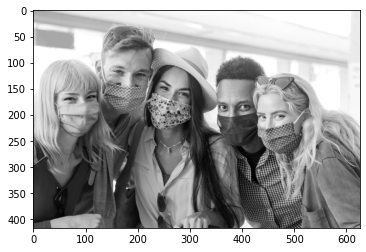

In [4]:
test_image = cv2.imread('maskgroup.jpg')

test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

plt.imshow(test_image_gray, cmap='gray');

In [11]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
haar_cascade_face_detector = cv2.CascadeClassifier('models/haarcascade_frontalface_alt2.xml')

In [8]:
#faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 3);
detect_faces = haar_cascade_face_detector.detectMultiScale(test_image_gray,
                                         scaleFactor=1.2,
                                         minNeighbors=2);

# Let us print the no. of faces found
print('Faces found: ', len(detect_faces))

Faces found:  3


In [9]:
for (x,y,w,h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2) 

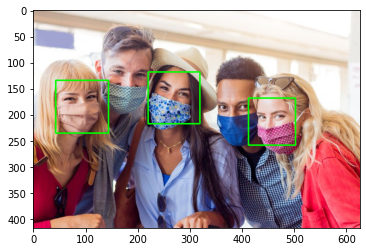

In [12]:
plt.imshow(convertToRGB(test_image))

In [15]:
model = load_model("mask_recog.h5")

In [50]:

def detect_faces(cascade, test_image):
    
    image_copy = test_image.copy()
    
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    detect_faces = cascade.detectMultiScale(gray_image,
                                         scaleFactor=1.2,
                                         minNeighbors=2,)
    
    faces_list=[]
    preds=[]
    for (x, y, w, h) in detect_faces:
        face_frame = image_copy[y:y+h,x:x+w]
        face_frame = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame = preprocess_input(face_frame)
        faces_list.append(face_frame)
        
        if len(faces_list)>0:
            for faces in faces_list:
                preds = model.predict(faces)
            for pred in preds:
                (mask, withoutMask) = pred
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
            label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
            
            cv2.putText(image_copy, label, (x, y- 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
 
            cv2.rectangle(image_copy, (x, y), (x + w, y + h),color,2 )
        
    return image_copy

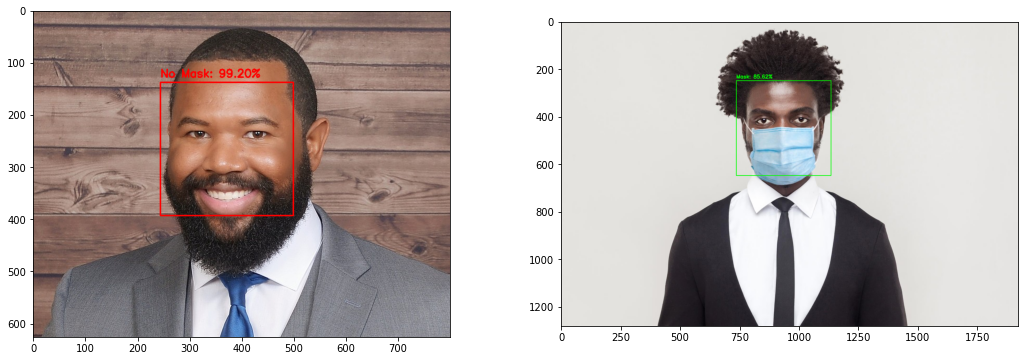

In [38]:

test_image1 = cv2.imread('cara.jpg')
test_image2 = cv2.imread('caramask.jpg')

faces1 = detect_faces(haar_cascade_face_detector, test_image1)
faces2 = detect_faces(haar_cascade_face_detector, test_image2)

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(convertToRGB(faces1))
plt.subplot(122)
plt.imshow(convertToRGB(faces2));

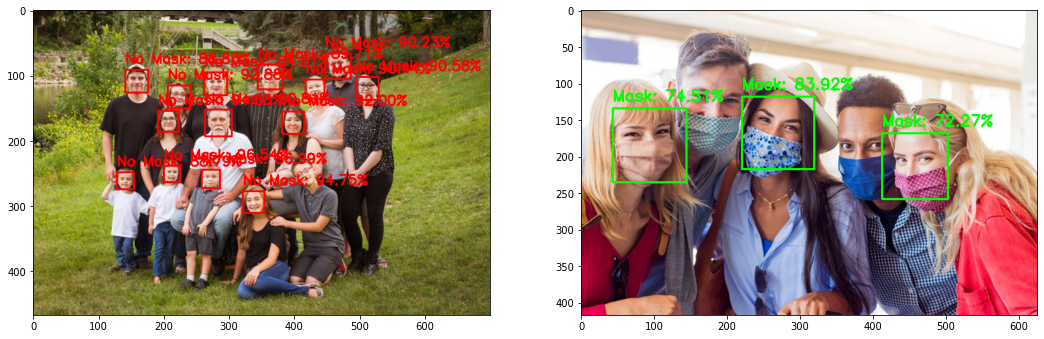

In [39]:
test_image3 = cv2.imread('group.jpg')
test_image4 = cv2.imread('maskgroup.jpg')

faces3 = detect_faces(haar_cascade_face_detector,test_image3)
faces4 = detect_faces(haar_cascade_face_detector,test_image4)

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(convertToRGB(faces3))
plt.subplot(122)
plt.imshow(convertToRGB(faces4));